### CASE 1 Visualize the Experiment Result

In [1]:
from cornac.experiment.experiment_explainers import Experiment_Explainers
from cornac.datasets.goodreads import prepare_data
from cornac.datasets import goodreads
from cornac.metrics_explainer import Metric_Exp_DIV as DIV, Metric_Exp_FPR as FPR, Metric_Exp_FA as FA, Metric_Exp_RA as RA
from cornac.models import EFM, MTER
from cornac.models import ALS, MF, EMF, NEMF

from cornac.explainer import Exp_EFM, Exp_MTER
from cornac.explainer import Exp_ALS as ALSExplainer, Exp_PHI4MF as PHI4MFExplainer, Exp_SU4EMF as EMFExplainer

from cornac.experiment import Visualization
from cornac.utils import cache
import warnings
warnings.filterwarnings('ignore')

/Users/yyz/miniconda3/envs/rose_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
rs_sent_dense = prepare_data(data_name="goodreads", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
fdiv = DIV()
fpr = FPR()
ground_truth_good_reads = goodreads.load_sentiment()
fpr_with_input_as_groundtruth = FPR(ground_truth=ground_truth_good_reads)
efm = EFM(max_iter=20, num_explicit_factors=50, num_latent_factors=50, num_most_cared_aspects=50, alpha=0.85,lambda_h=0.1, lambda_u=0.001, lambda_v=0.01, lambda_x=1.0, lambda_y= 0.1)
efm_exp = Exp_EFM(rec_model=efm, dataset=rs_sent_dense.train_set)
mter = MTER(max_iter=20, n_aspect_factors=8, n_item_factors=5, n_opinion_factors= 5, n_user_factors= 10, lambda_bpr=10, lambda_reg= 10, n_bpr_samples=1000, n_element_samples=50)
mter_exp = Exp_MTER(rec_model=mter, dataset=rs_sent_dense.train_set)

rs_dense = prepare_data(data_name="goodreads_uir_1000", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
emf = EMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, verbose=True, seed=6, num_threads=6, early_stop=True)
nemf = NEMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, novel_reg=1, verbose=True, seed=6, num_threads=6, early_stop=True)
als = ALS(k=10, max_iter=500, lambda_reg=0.001, alpha=1, verbose=True, seed=6)
als_exp = ALSExplainer(rec_model=als, dataset=rs_dense.train_set)
emf_exp = EMFExplainer(rec_model=emf, dataset=rs_dense.train_set)
nemf_exp = EMFExplainer(rec_model=nemf, dataset=rs_dense.train_set)

# models = [(als, als_exp), (emf, emf_exp), (nemf, nemf_exp)]
models = [(als, als_exp)]
metrics = [fdiv]
experiment = Experiment_Explainers(eval_method=rs_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)
experiment.run()

models = [(efm, efm_exp), (mter, mter_exp)]
metrics = [fdiv, fpr_with_input_as_groundtruth]
experiment_sent = Experiment_Explainers(eval_method=rs_sent_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)
experiment_sent.run()

Start training Recommender ALS...


100%|██████████| 500/500 [00:00<00:00, 502.90it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:02<00:00, 394.34it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.14665965965947625
experiment data: [[0.14665965965947625, 0.9966259002685547, 3.4317758083343506]]


recommender:explainer |      Metric_Exp_DIV |           Train(s) |        Evaluate(s)
ALS:Exp_ALS           | 0.14665965965947625 | 0.9966259002685547 | 3.4317758083343506

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 6148.32it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.485285285285342
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  10%|█         | 900/9000 [00:00<00:05, 1451.97it/s]


Result: Feature Precision: 0.41344956413449563; Feature Recall: 0.06367539344100256; Harmonic Mean: 0.10135436037495119
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 7519.92it/s]

Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.09242842842849502


Step 3/3: Metric Metric_Exp_FPR starts evaluation...


TypeError: list indices must be integers or slices, not str

Plot the bar chart for the metrics:


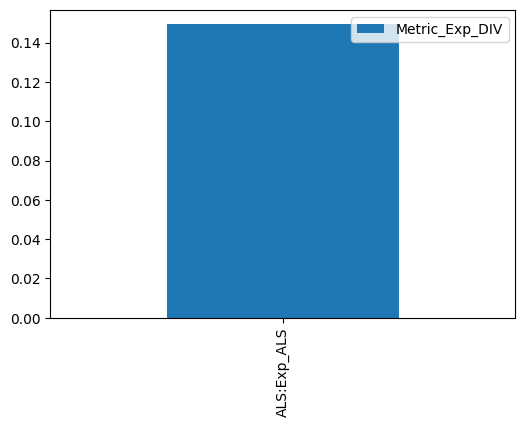

             Metric_Exp_DIV
ALS:Exp_ALS        0.149226
Plot the bar chart for the cost:


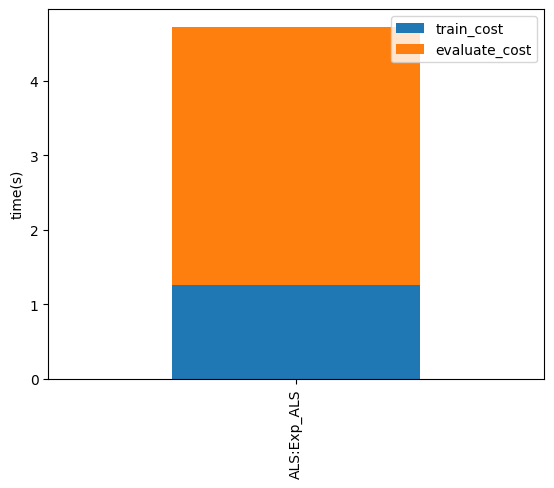

In [4]:
vis = Visualization()
vis.visualize_experiemnt_result([experiment, experiment_sent], kind="bar")

### CASE 2 Visualize the Effect of Parameters' Change (rec_k, feature_k)
Problem:
    - Explainaer_Experiment(models = [model_1, model_2], rec_k=10, feature_k = 10) fixed parameter for all models/explainers 
Solution:
    - Pass a list of Explainer_Experiment Object to func Visualization_Parameter_Change([EE_1, EE_2, EE_3], param_name = 'rec_k/feature_k')

##### 2.1 Metrics FDIV&FPR on the sentiment-related model & explainers vs feature_k

In [1]:
from cornac.metrics_explainer.exp_experiment import Explainers_Experiment
from cornac.datasets.goodreads import prepare_data
from cornac.metrics_explainer import Metric_Exp_DIV as DIV, Metric_Exp_FPR as FPR, Metric_Exp_FA as FA, Metric_Exp_RA as RA
from cornac.models import EFM, MTER
from cornac.models import ALS, MF, EMF, NEMF

from cornac.explainer import Exp_EFM, Exp_MTER
from cornac.explainer import Exp_ALS as ALSExplainer, Exp_PHI4MF as PHI4MFExplainer, Exp_SU4EMF as EMFExplainer

from cornac.experiment import Visualization
from cornac.utils import cache
import warnings
warnings.filterwarnings('ignore')

/Users/yaoyao/miniconda3/envs/rose/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
feature_k_list = [i for i in range(5, 11)]
rs_sent_dense = prepare_data(data_name="goodreads", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
fdiv = DIV()
fpr = FPR()
file_path = cache("https://zenodo.org/records/11061007/files/goodreads_sentiment_full.txt?download=1")
fpr_with_input_as_groundtruth = FPR(fpath=file_path)
efm = EFM(max_iter=20, num_explicit_factors=50, num_latent_factors=50, num_most_cared_aspects=50, alpha=0.85,lambda_h=0.1, lambda_u=0.001, lambda_v=0.01, lambda_x=1.0, lambda_y= 0.1)
efm_exp = Exp_EFM(rec_model=efm, dataset=rs_sent_dense.train_set)

mter = MTER(max_iter=20, n_aspect_factors=8, n_item_factors=5, n_opinion_factors= 5, n_user_factors= 10, lambda_bpr=10, lambda_reg= 10, n_bpr_samples=1000, n_element_samples=50)
mter_exp = Exp_MTER(rec_model=mter, dataset=rs_sent_dense.train_set)

models = [(efm, efm_exp), (mter, mter_exp)]
metrics = [fdiv, fpr_with_input_as_groundtruth]

### To visualize the effect of increasing the number of features, we can run the experiment for different values of feature_k
EE_list = []
for feature_k in feature_k_list:
    experiment_sent = Explainers_Experiment(eval_method=rs_sent_dense, models=models, metrics=metrics,rec_k=10, feature_k=feature_k, eval_train=True)
    experiment_sent.run()
    EE_list.append(experiment_sent)


Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 2793.85it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.5126459793127387
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :   0%|          | 0/9000 [00:02<?, ?it/s]


Result: Feature Precision: 0.3408408408408408; Feature Recall: 0.018498726792813773; Harmonic Mean: 0.03446495702130921
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3315.39it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.2322135468799819
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  60%|█████▉    | 354/594 [00:00<00:00, 2237.35it/s]


Result: Feature Precision: 0.4462585034013606; Feature Recall: 0.28551792229793294; Harmonic Mean: 0.2961110531678254
experiment data: [[0.5126459793127387, 0.03446495702130921, 0.07227087020874023, 6.0450921058654785], [0.2322135468799819, 0.2961110531678254, 0.07977795600891113, 3.078749895095825]]


recommender:explainer |     Metric_Exp_DIV |      Metric_Exp_FPR |            Train(s) |        Evaluate(s)
EFM:Exp_EFM           | 0.5126459793127387 | 0.03446495702130921 | 0.07227087020874023 | 6.0450921058654785
MTER:Exp_MTER         | 0.2322135468799819 |  0.2961110531678254 | 0.07977795600891113 |  3.078749895095825

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3712.33it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.2742075408738361
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  20%|██        | 1800/9000 [00:02<00:11, 641.63it/s] 


Result: Feature Precision: 0.3959581717776995; Feature Recall: 0.021685757833163122; Harmonic Mean: 0.040279998268049635
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3761.96it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.09410610610610862
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  50%|████▉     | 295/594 [00:00<00:00, 1964.27it/s]


Result: Feature Precision: 0.4603960396039604; Feature Recall: 0.2863839878847979; Harmonic Mean: 0.30105496686391386
experiment data: [[0.2742075408738361, 0.040279998268049635, 0.0722200870513916, 5.647578954696655], [0.09410610610610862, 0.30105496686391386, 0.09504485130310059, 3.116239309310913]]


recommender:explainer |      Metric_Exp_DIV |       Metric_Exp_FPR |            Train(s) |       Evaluate(s)
EFM:Exp_EFM           |  0.2742075408738361 | 0.040279998268049635 |  0.0722200870513916 | 5.647578954696655
MTER:Exp_MTER         | 0.09410610610610862 |  0.30105496686391386 | 0.09504485130310059 | 3.116239309310913

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 2147.29it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.1173173173175081
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  40%|████      | 3600/9000 [00:03<00:05, 982.37it/s] 


Result: Feature Precision: 0.45299497971253694; Feature Recall: 0.02341618538983572; Harmonic Mean: 0.043488998744337634
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3641.22it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.1121868535202164
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  40%|███▉      | 236/594 [00:00<00:00, 1480.41it/s]


Result: Feature Precision: 0.45484400656814455; Feature Recall: 0.2729615638470978; Harmonic Mean: 0.2907624212502562
experiment data: [[0.1173173173175081, 0.043488998744337634, 0.07333803176879883, 6.798125982284546], [0.1121868535202164, 0.2907624212502562, 0.07389092445373535, 2.971816062927246]]


recommender:explainer |     Metric_Exp_DIV |       Metric_Exp_FPR |            Train(s) |       Evaluate(s)
EFM:Exp_EFM           | 0.1173173173175081 | 0.043488998744337634 | 0.07333803176879883 | 6.798125982284546
MTER:Exp_MTER         | 0.1121868535202164 |   0.2907624212502562 | 0.07389092445373535 | 2.971816062927246

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3025.93it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.08355021688356427
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  60%|██████    | 5400/9000 [00:03<00:02, 1475.53it/s]


Result: Feature Precision: 0.5034520348837209; Feature Recall: 0.027103808004370875; Harmonic Mean: 0.04995562071981766
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3610.19it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.12008675342016265
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  30%|██▉       | 177/594 [00:00<00:00, 1172.21it/s]


Result: Feature Precision: 0.466996699669967; Feature Recall: 0.27995944092562747; Harmonic Mean: 0.29558726663238744
experiment data: [[0.08355021688356427, 0.04995562071981766, 0.07059979438781738, 6.602771043777466], [0.12008675342016265, 0.29558726663238744, 0.07384896278381348, 3.1190638542175293]]


recommender:explainer |      Metric_Exp_DIV |      Metric_Exp_FPR |            Train(s) |        Evaluate(s)
EFM:Exp_EFM           | 0.08355021688356427 | 0.04995562071981766 | 0.07059979438781738 |  6.602771043777466
MTER:Exp_MTER         | 0.12008675342016265 | 0.29558726663238744 | 0.07384896278381348 | 3.1190638542175293

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 2189.07it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.08081414748081654
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  60%|██████    | 5400/9000 [00:05<00:03, 1073.08it/s]


Result: Feature Precision: 0.5468722621342211; Feature Recall: 0.029134663779393943; Harmonic Mean: 0.05376224041324946
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3734.92it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.11244577911247523
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  40%|███▉      | 236/594 [00:00<00:00, 1586.74it/s]


Result: Feature Precision: 0.4465709728867624; Feature Recall: 0.2775041162531541; Harmonic Mean: 0.29317034399984987
experiment data: [[0.08081414748081654, 0.05376224041324946, 0.07232284545898438, 8.124300003051758], [0.11244577911247523, 0.29317034399984987, 0.07309079170227051, 2.9822640419006348]]


recommender:explainer |      Metric_Exp_DIV |      Metric_Exp_FPR |            Train(s) |        Evaluate(s)
EFM:Exp_EFM           | 0.08081414748081654 | 0.05376224041324946 | 0.07232284545898438 |  8.124300003051758
MTER:Exp_MTER         | 0.11244577911247523 | 0.29317034399984987 | 0.07309079170227051 | 2.9822640419006348

Start training Recommender EFM...
*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
Step 1/3: Recommender EFM creates recommendations
Step 2/3: Explainer Exp_EFM create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 2300.32it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.07280613947275558
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  60%|██████    | 5400/9000 [00:03<00:02, 1504.74it/s]


Result: Feature Precision: 0.5662807761291374; Feature Recall: 0.030796707377781615; Harmonic Mean: 0.05676149069884324
Start training Recommender MTER...
*****Start evaluating model-explainer: 'MTER:Exp_MTER'...
Step 1/3: Recommender MTER creates recommendations
Step 2/3: Explainer Exp_MTER create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 3655.62it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.10930930930934771
Step 3/3: Metric Metric_Exp_FPR starts evaluation...


Start evaluation... :  40%|███▉      | 236/594 [00:00<00:00, 1565.10it/s]


Result: Feature Precision: 0.4686468646864686; Feature Recall: 0.26365530339042365; Harmonic Mean: 0.28879804631315487
experiment data: [[0.07280613947275558, 0.05676149069884324, 0.07100176811218262, 6.5809221267700195], [0.10930930930934771, 0.28879804631315487, 0.0718679428100586, 3.1251697540283203]]


recommender:explainer |      Metric_Exp_DIV |      Metric_Exp_FPR |            Train(s) |        Evaluate(s)
EFM:Exp_EFM           | 0.07280613947275558 | 0.05676149069884324 | 0.07100176811218262 | 6.5809221267700195
MTER:Exp_MTER         | 0.10930930930934771 | 0.28879804631315487 |  0.0718679428100586 | 3.1251697540283203



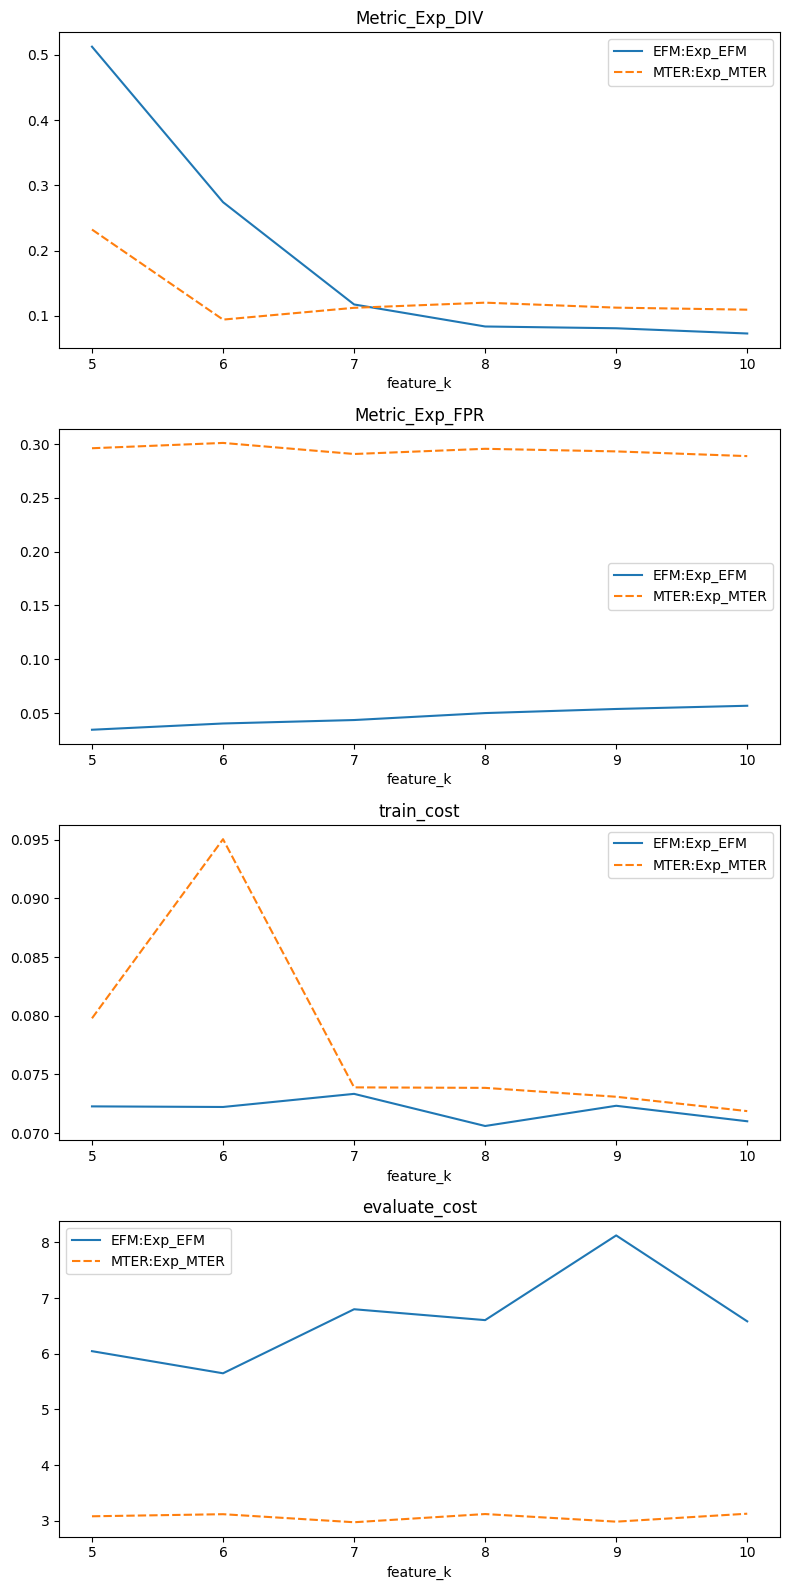

In [7]:
vis = Visualization()
vis.visualize_target_k(EE_list, target_k_name="feature_k", kind="line")

##### 2.1 Metrics FDIV on the MF models & explainers vs feature_k

In [2]:
rs_dense = prepare_data(data_name="goodreads_uir_1000", test_size=0, dense=True, item=True, user=True, sample_size=1, seed=21)
emf = EMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, verbose=True, seed=6, num_threads=6, early_stop=True)
nemf = NEMF(k=10, max_iter=500, learning_rate=0.001, lambda_reg=0.1, explain_reg=0.01, novel_reg=1, verbose=True, seed=6, num_threads=6, early_stop=True)
als = ALS(k=10, max_iter=500, lambda_reg=0.001, alpha=1, verbose=True, seed=6)
als_exp = ALSExplainer(rec_model=als, dataset=rs_dense.train_set)
emf_exp = EMFExplainer(rec_model=emf, dataset=rs_dense.train_set)
nemf_exp = EMFExplainer(rec_model=nemf, dataset=rs_dense.train_set)
fdiv = DIV()
models = [(als, als_exp), (emf, emf_exp), (nemf, nemf_exp)]
metrics = [fdiv]
experiment = Explainers_Experiment(eval_method=rs_dense, models=models, metrics=metrics,rec_k=10, feature_k=10, eval_train=True)

# feature_k_list = [i for i in range(5, 11)]
rec_k_list = [i for i in range(5, 11)]
EE_list = []
for rec_k in rec_k_list:
    experiment = Explainers_Experiment(eval_method=rs_dense, models=models, metrics=metrics,rec_k=rec_k, feature_k=10, eval_train=True)
    experiment.run()
    EE_list.append(experiment)


Start training Recommender ALS...


100%|██████████| 500/500 [00:01<00:00, 457.12it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 500/500 [00:01<00:00, 277.68it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.154946693386793
Start training Recommender EMF...


100%|██████████| 500/500 [00:00<00:00, 2727.24it/s, loss=5963.38]


Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 500/500 [00:00<00:00, 1274.30it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.387880701084826
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


100%|██████████| 500/500 [00:00<00:00, 2627.95it/s, loss=6023.49]


Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 500/500 [00:00<00:00, 1217.50it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.40113299615115783
experiment data: [[0.154946693386793, 1.182861089706421, 2.17081880569458], [0.387880701084826, 0.2238171100616455, 0.6256618499755859], [0.40113299615115783, 0.24219298362731934, 0.6451351642608643]]


recommender:explainer |      Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           |   0.154946693386793 |   1.182861089706421 |   2.17081880569458
EMF:Exp_EMF           |   0.387880701084826 |  0.2238171100616455 | 0.6256618499755859
NEMF:Exp_EMF          | 0.40113299615115783 | 0.24219298362731934 | 0.6451351642608643

Start training Recommender ALS...


100%|██████████| 500/500 [00:00<00:00, 521.53it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 600/600 [00:01<00:00, 340.67it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.15056316082352184
Start training Recommender EMF...


100%|██████████| 500/500 [00:00<00:00, 1609.22it/s, loss=5948.60]


Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 600/600 [00:00<00:00, 1481.32it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.38953121163148313
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


100%|██████████| 500/500 [00:00<00:00, 2166.37it/s, loss=6111.72]


Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 600/600 [00:00<00:00, 1462.32it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.3922972083102141
experiment data: [[0.15056316082352184, 0.9604003429412842, 2.190124750137329], [0.38953121163148313, 0.3485219478607178, 0.7140312194824219], [0.3922972083102141, 0.2825601100921631, 0.7211508750915527]]


recommender:explainer |      Metric_Exp_DIV |           Train(s) |        Evaluate(s)
ALS:Exp_ALS           | 0.15056316082352184 | 0.9604003429412842 |  2.190124750137329
EMF:Exp_EMF           | 0.38953121163148313 | 0.3485219478607178 | 0.7140312194824219
NEMF:Exp_EMF          |  0.3922972083102141 | 0.2825601100921631 | 0.7211508750915527

Start training Recommender ALS...


100%|██████████| 500/500 [00:01<00:00, 495.25it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 700/700 [00:01<00:00, 383.19it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.14789658696080993
Start training Recommender EMF...


100%|██████████| 500/500 [00:00<00:00, 3096.15it/s, loss=5990.93]

Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations


Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 700/700 [00:00<00:00, 1404.80it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.38712889647964965
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


 16%|█▌        | 80/500 [00:00<00:00, 2548.33it/s, loss=6114.89]


Early stopping, delta_loss = 0.0000
Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 700/700 [00:00<00:00, 1579.35it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.39223772541890545
experiment data: [[0.14789658696080993, 1.0110666751861572, 2.3439862728118896], [0.38712889647964965, 0.19951319694519043, 0.88547682762146], [0.39223772541890545, 0.08144307136535645, 0.8280248641967773]]


recommender:explainer |      Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           | 0.14789658696080993 |  1.0110666751861572 | 2.3439862728118896
EMF:Exp_EMF           | 0.38712889647964965 | 0.19951319694519043 |   0.88547682762146
NEMF:Exp_EMF          | 0.39223772541890545 | 0.08144307136535645 | 0.8280248641967773

Start training Recommender ALS...


100%|██████████| 500/500 [00:00<00:00, 555.27it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 800/800 [00:02<00:00, 354.76it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.147944305381483
Start training Recommender EMF...


100%|██████████| 500/500 [00:00<00:00, 3226.22it/s, loss=5989.35]


Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 800/800 [00:00<00:00, 1426.58it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.3890186530281147
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


  3%|▎         | 17/500 [00:00<00:00, 2468.09it/s, loss=6115.51]


Early stopping, delta_loss = 0.0000
Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 800/800 [00:00<00:00, 1602.16it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.39170737479336865
experiment data: [[0.147944305381483, 0.9021921157836914, 2.868690013885498], [0.3890186530281147, 0.19277501106262207, 1.0533509254455566], [0.39170737479336865, 0.05764603614807129, 0.9969918727874756]]


recommender:explainer |      Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           |   0.147944305381483 |  0.9021921157836914 |  2.868690013885498
EMF:Exp_EMF           |  0.3890186530281147 | 0.19277501106262207 | 1.0533509254455566
NEMF:Exp_EMF          | 0.39170737479336865 | 0.05764603614807129 | 0.9969918727874756

Start training Recommender ALS...


100%|██████████| 500/500 [00:00<00:00, 555.52it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 900/900 [00:02<00:00, 396.16it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.14600494376438206
Start training Recommender EMF...


 31%|███       | 154/500 [00:00<00:00, 2789.96it/s, loss=5988.19]


Early stopping, delta_loss = 0.0000
Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 900/900 [00:00<00:00, 1546.89it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.38990508854602923
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


 50%|█████     | 252/500 [00:00<00:00, 2583.61it/s, loss=6121.77]


Early stopping, delta_loss = 0.0000
Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 900/900 [00:00<00:00, 1547.36it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.3925656147430938
experiment data: [[0.14600494376438206, 0.9017789363861084, 3.019649028778076], [0.38990508854602923, 0.09316396713256836, 1.2492733001708984], [0.3925656147430938, 0.14806485176086426, 1.1888659000396729]]


recommender:explainer |      Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           | 0.14600494376438206 |  0.9017789363861084 |  3.019649028778076
EMF:Exp_EMF           | 0.38990508854602923 | 0.09316396713256836 | 1.2492733001708984
NEMF:Exp_EMF          |  0.3925656147430938 | 0.14806485176086426 | 1.1888659000396729

Start training Recommender ALS...


100%|██████████| 500/500 [00:00<00:00, 558.47it/s, loss=0.0285]
INFO:implicit:Final training loss 0.0285


*****Start evaluating model-explainer: 'ALS:Exp_ALS'...
Step 1/3: Recommender ALS creates recommendations
Step 2/3: Explainer Exp_ALS create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:02<00:00, 394.10it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.14425805805787978
Start training Recommender EMF...


100%|██████████| 500/500 [00:00<00:00, 2193.56it/s, loss=5989.05]


Optimization finished!
*****Start evaluating model-explainer: 'EMF:Exp_EMF'...
Step 1/3: Recommender EMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 1555.66it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.3852012782622668
Start training Recommender NEMF...
Start compute edge weight matrix...
Start compute novel matrix...
Matrix computation finished!


 34%|███▍      | 172/500 [00:00<00:00, 2584.84it/s, loss=6124.46]


Early stopping, delta_loss = 0.0000
Optimization finished!
*****Start evaluating model-explainer: 'NEMF:Exp_EMF'...
Step 1/3: Recommender NEMF creates recommendations
Step 2/3: Explainer Exp_EMF create explanation for all recommendations


Computing explanations: 100%|██████████| 1000/1000 [00:00<00:00, 1574.86it/s]


Step 3/3: Metric Metric_Exp_DIV starts evaluation...
Result: Feature diversity: 0.39228433115646894
experiment data: [[0.14425805805787978, 0.8967478275299072, 3.414008140563965], [0.3852012782622668, 0.2657909393310547, 1.3906190395355225], [0.39228433115646894, 0.11675000190734863, 1.3675181865692139]]


recommender:explainer |      Metric_Exp_DIV |            Train(s) |        Evaluate(s)
ALS:Exp_ALS           | 0.14425805805787978 |  0.8967478275299072 |  3.414008140563965
EMF:Exp_EMF           |  0.3852012782622668 |  0.2657909393310547 | 1.3906190395355225
NEMF:Exp_EMF          | 0.39228433115646894 | 0.11675000190734863 | 1.3675181865692139



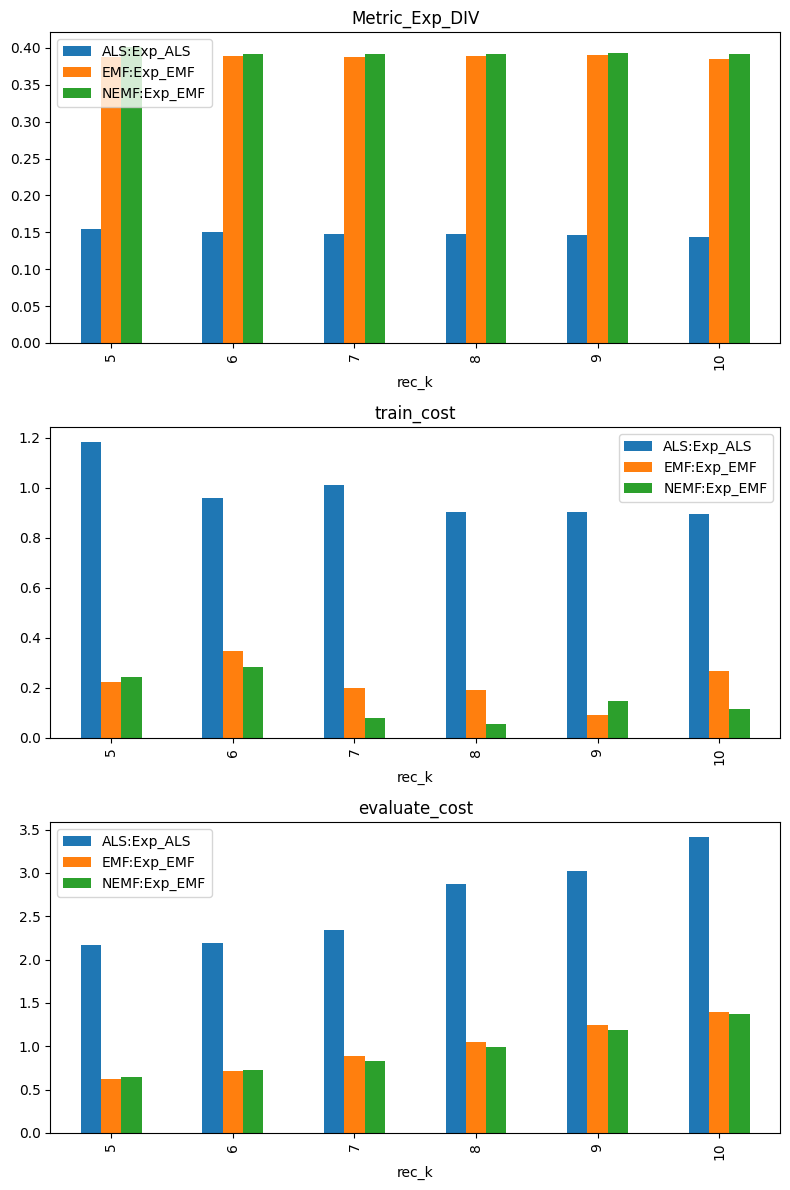

In [3]:
vis = Visualization()
vis.visualize_target_k(EE_list, target_k_name="rec_k", kind="bar")

### CASE 3 Visualize feature importance



In [1]:
import numpy as np
from cornac.models.fm_py import FMRec
from cornac.explainer.exp_limers import Exp_LIMERS
from cornac.datasets.goodreads import prepare_data
import warnings
warnings.filterwarnings('ignore')

rs = prepare_data(data_name="goodreads_limers", test_size=0.2, dense=True, item=True, user=False, sample_size=0.5, seed=21)
fm = FMRec()
fm.fit(train_set=rs.train_set)
explainer = Exp_LIMERS(fm, fm.train_set)
users = np.array(list(rs.train_set.uid_map.keys()))
items = np.array(list(rs.train_set.iid_map.keys()))
recommendations = fm.recommend_to_multiple_users(users)
explanations = explainer.explain_recommendations(recommendations)

/Users/yyz/miniconda3/envs/rose_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.91899
-- Epoch 2
Training MSE: 0.76278
-- Epoch 3
Training MSE: 0.73507
-- Epoch 4
Training MSE: 0.72087
-- Epoch 5
Training MSE: 0.70938
-- Epoch 6
Training MSE: 0.70206
-- Epoch 7
Training MSE: 0.69043
-- Epoch 8
Training MSE: 0.68147
-- Epoch 9
Training MSE: 0.67710
-- Epoch 10
Training MSE: 0.67173


Computing explanations: 100%|██████████| 10000/10000 [01:56<00:00, 85.63it/s]


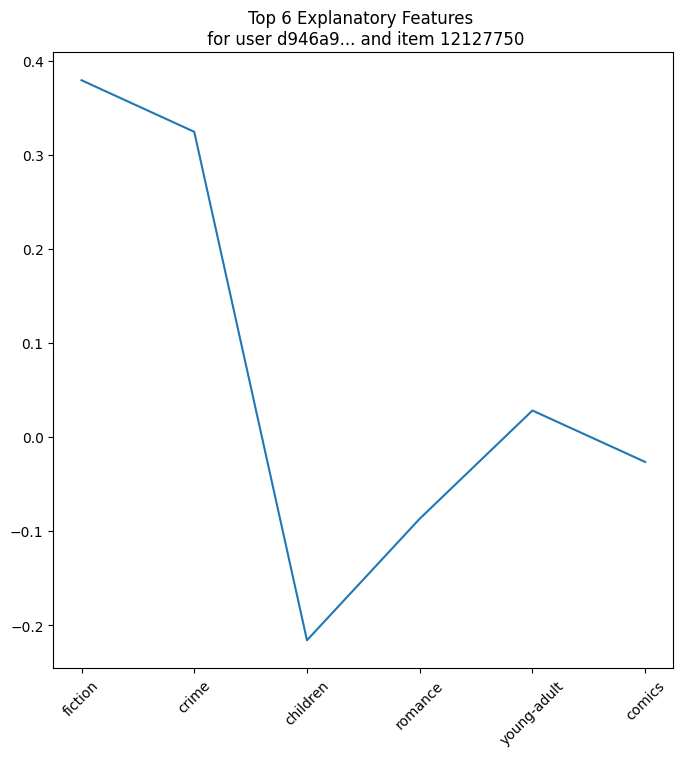

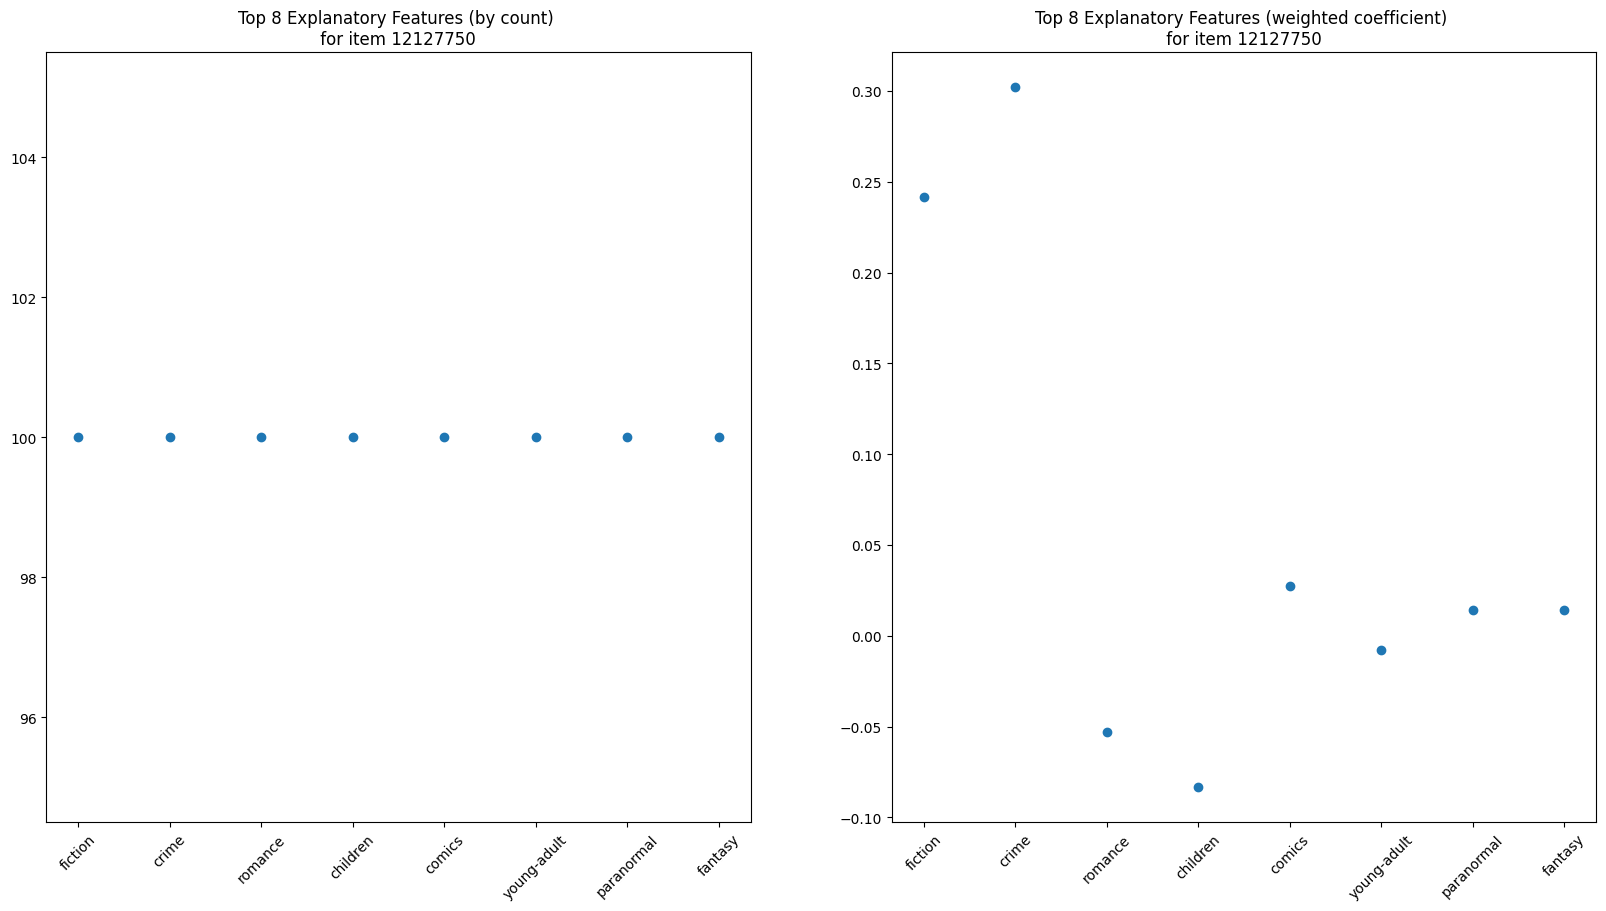

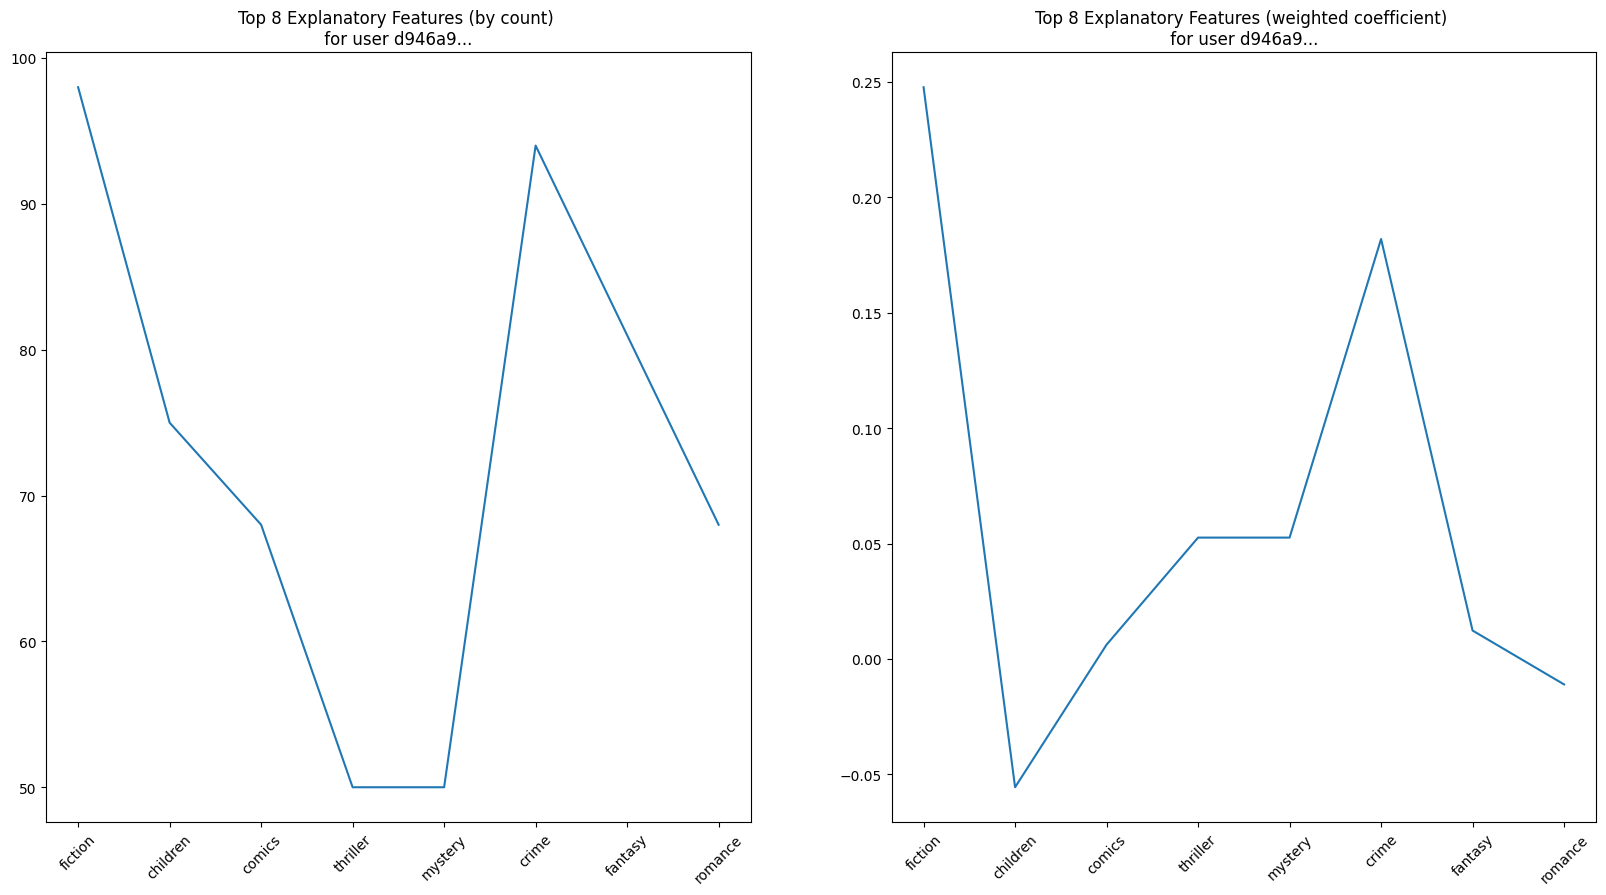

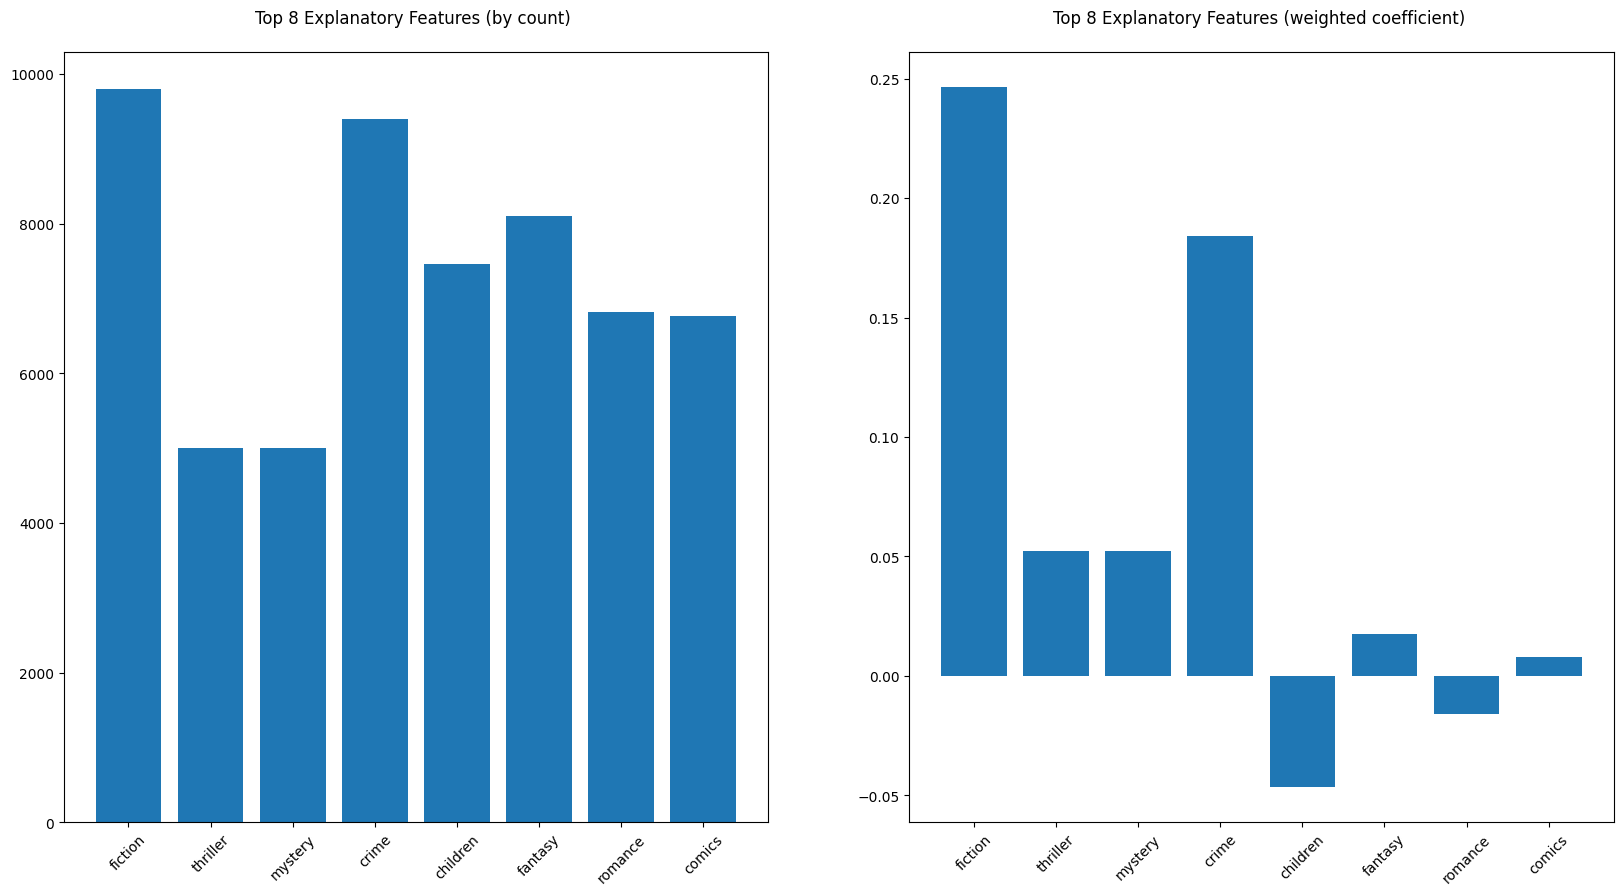

In [2]:
from cornac.experiment.visualization import Visualization

explanations_df = explanations.copy()
my_plots = Visualization()
ind_df = my_plots.create_individual_feature_importance_plot(explanations, user_id='d946a9aaa488924227a587c91564a484', item_id=12127750, type="line", top_k=6, save_plot=False)

filtered_df1 = my_plots.create_aggregate_feature_importance_plot(explanations, item_id=12127750, type="scatter", top_k=8, save_plot=False)

filtered_df2 = my_plots.create_aggregate_feature_importance_plot(explanations, user_id='d946a9aaa488924227a587c91564a484', type="line", top_k=8, save_plot=False)

filtered_df3 = my_plots.create_aggregate_feature_importance_plot(explanations, type="bar", top_k=8, save_plot=False)